In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
# loading the dataset
df = pd.read_csv('../datasets/heart.csv')

In [3]:
# first 5 rows
df.head()

# age - age in years
# sex - (1 = male, 0 = female)
# cp - chest pain type (0 = No pain, 3 = Severe)
# trestbps - resting blood pressure (in mm Hg)
# chol - serum cholestoral in mg/dl
# fbs - fasting blood sugar (1 = greator that 120 mg/dl; 0 = lesser that 120 mg/dl)
# restecg - resting electrocardiographic results (0=normal, 1=ST-T wave abnormality, 2=left ventricular hypertrophy)
# thalach - maximum heart rate achieved
# exang - exercise induced angina (1 = yes; 0 = no)
# oldpeak - ST depression induced by exercise relative to rest
# slope - the slope of the peak exercise ST segment (0=upsloping, 1=flat, 2=downsloping)
# ca - number of major vessels (0-3) colored by flourosopy
# thal - (1 = normal; 2 = fixed defect; 3 = reversable defect)
# target - (1=disease,  0=no disease)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# describing the structure of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
cat = ['sex', 'cp', 'fbs', 'slope', 'ca', 'thal']
for i in cat:
    print(i)
    print(df[i].value_counts())

sex
1    207
0     96
Name: sex, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
fbs
0    258
1     45
Name: fbs, dtype: int64
slope
2    142
1    140
0     21
Name: slope, dtype: int64
ca
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
thal
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


In [7]:
# splitting the data into test and train sets
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=10)

In [8]:
# trying the Random Forest Classifier Model
model_rf = RandomForestClassifier(max_depth=5)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [9]:
# Accuracy achieved = 91%
model_rf.score(X_test, y_test)

0.9130434782608695

In [10]:
# trying the Logistic Regression Model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_test, y_test)

LogisticRegression(max_iter=1000)

In [11]:
# Accuracy achieved = 93%
model_lr.score(X_test, y_test)

0.9347826086956522

In [12]:
predictions = model_lr.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

Text(33.0, 0.5, 'Truth')

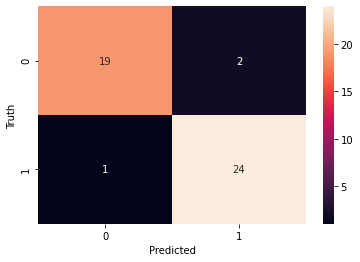

In [14]:
# printing the confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, )
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.92      0.96      0.94        25

    accuracy                           0.93        46
   macro avg       0.94      0.93      0.93        46
weighted avg       0.94      0.93      0.93        46



In [16]:
# saving the trained model for later use
pickle.dump(model_lr,open('../Saved Models/heart_disease.pickle','wb'))